# 7章 データの管理：データのクリーニング、変換、まーじ、再結成

## 7.1 データセットのマージ
### 7.1.1 データベース風のデータフレームのマージ

In [1]:
df1 = DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                'data1':range(7)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [2]:
df2 = DataFrame({'key':['a', 'b', 'd'], 
                'data2':range(3)})
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [4]:
# inner joinと一緒
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [5]:
df3 = DataFrame({'lkey':['b', 'b', 'a', 'c', 'a', 'a', 'b'], 
                'data1':range(7)})
df4 = DataFrame({'rkey':['a', 'b', 'd'], 
                'data2':range(3)})

In [6]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [7]:
# 外部結合 ⇨ 和集合を取る
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0
6,3,c,NaN
7,NaN,d,2


In [8]:
df1 = DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'b'], 
                'data1': range(6)})
df2 = DataFrame({'key':['a', 'b', 'a', 'b', 'd'], 
                'data2':range(5)})
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [9]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,2,a,0
5,2,a,2
6,3,c,NaN
7,4,a,0
8,4,a,2
9,5,b,1


In [10]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [13]:
left = DataFrame({'key1':['foo', 'foo', 'bar'], 
                 'key2':['one', 'two', 'one'], 
                 'lval':[1, 2, 3]})
right = DataFrame({'key1':['foo', 'foo', 'bar', 'bar'], 
                 'key2':['one', 'one', 'one', 'two'], 
                 'rval':[4, 5, 6, 7]})

In [14]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,NaN
3,bar,one,3,6
4,bar,two,NaN,7


In [15]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [16]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### 7.1.2 インデックスによるマージ

In [2]:
left1 = DataFrame({'key':['a', 'b', 'a', 'a', 'b', 'c'], 'value' : range(6)})
right1 = DataFrame({'group_val':[3.5, 7]}, index = ['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [3]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [4]:
# 階層的にインデックスされたデータのmerge
left = DataFrame({'key1' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 
                 'key2' : [2000, 2001, 2002, 2001, 2002], 
                 'data' : np.arange(5.)})
left

,data,key1,key2
0,0,Ohio,2000
1,1,Ohio,2001
2,2,Ohio,2002
3,3,Nevada,2001
4,4,Nevada,2002


In [5]:
right = DataFrame(np.arange(12).reshape((6,2)), 
                 index = [['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'], 
                          [2001, 2000, 2000, 2000, 2001, 2002]], 
                 columns=['event1', 'event2'])
right

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [6]:
pd.merge(left, right, left_on=['key1', 'key2'], right_index = True)

,data,key1,key2,event1,event2
0,0,Ohio,2000,4,5
0,0,Ohio,2000,6,7
1,1,Ohio,2001,8,9
2,2,Ohio,2002,10,11
3,3,Nevada,2001,0,1


### 7.1.3 軸に沿った連結

In [7]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [9]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [10]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [11]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [12]:
s4 = pd.concat([s1 * 5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [13]:
pd.concat([s1, s4], axis=1)

,0,1
a,0,0
b,1,5
f,NaN,5
g,NaN,6


In [14]:
pd.concat([s1, s4], axis = 1, join='inner')

,0,1
a,0,0
b,1,5


In [15]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0,0
c,NaN,NaN
b,1,5
e,NaN,NaN


In [16]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [17]:
result.unstack()

,a,b,f,g
one,0,1,NaN,NaN
two,0,1,NaN,NaN
three,NaN,NaN,5,6


In [18]:
df1 = DataFrame(np.arange(6).reshape(3,2), index=['a', 'b', 'c'], 
               columns=['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [19]:
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], 
               columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [20]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [21]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1      5    6
b          2   3    NaN  NaN
c          4   5      7    8

In [22]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [23]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-2.731440,-0.135205,-0.659232,0.653833
1,0.875018,0.209835,0.717325,0.222022
2,3.463651,0.822529,-1.198869,-0.099273
3,-0.352195,0.728867,NaN,-1.300625
4,0.014661,-1.210294,NaN,0.319270


### 7.1.4 重複のあるデータの結合

In [25]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], 
          index = ['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64), 
          index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
b

f     0
e     1
d     2
c     3
b     4
a   NaN
dtype: float64

In [26]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [28]:
# 上記をcombine_first関数で実現できる
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [29]:
df1 = DataFrame({'a':[1., np.nan, 5., np.nan], 
                'b':[np.nan, 2., np.nan, 6.], 
                'c':range(2, 18, 4)})
df1

,a,b,c
0,1,NaN,2
1,NaN,2,6
2,5,NaN,10
3,NaN,6,14


In [30]:
df2 = DataFrame({'a':[5., 4., np.nan, 3., 7.], 
                'b':[np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5,NaN
1,4,3
2,NaN,4
3,3,6
4,7,8


In [31]:
# DataFrameの場合、combine_firstは列毎に
df1.combine_first(df2)

,a,b,c
0,1,NaN,2
1,4,2,6
2,5,4,10
3,3,6,14
4,7,8,NaN


## 7.2 再形成とピボット
### 7.2.1 階層的にインデックス付けされているデータの再形成

In [32]:
data = DataFrame(np.arange(6).reshape(2, 3), 
                index=pd.Index(['Ohio', 'Colorado'], name='state'), 
                columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [33]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [34]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [35]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [36]:
s1 = Series([0,1,2,3], index=['a', 'b', 'c', 'd'])
s2 = Series([4,5,6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [37]:
data2.unstack()

,a,b,c,d,e
one,0,1,2,3,NaN
two,NaN,NaN,4,5,6


In [39]:
data2.unstack().stack(dropna=False)

one  a     0
     b     1
     c     2
     d     3
     e   NaN
two  a   NaN
     b   NaN
     c     4
     d     5
     e     6
dtype: float64

In [40]:
df = DataFrame({'left':result, 'right': result + 5}, 
              columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [43]:
df.unstack('state').stack('side')

state         Ohio  Colorado
number side                 
one    left      0         3
       right     5         8
two    left      1         4
       right     6         9
three  left      2         5
       right     7        10

### 7.2.2 「long」フォーマットから「wide」フォーマットへのピボット

## 7.3 データの変換
### 7.3.1 重複の除去

In [44]:
data = DataFrame({'k1':['one'] * 3 + ['two'] * 4, 
                 'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [45]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [46]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [49]:
data.drop_duplicates(['k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


### 7.3.2 関数やマッピングを用いたデータの変換

In [53]:
data = DataFrame({'food':['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 
                          'Bacon', 'pastrami', 'honey ham', 'nova lox'], 
                 'ounces':[4,3,12,6,7.5,8,3,5,6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [54]:
meat_to_animal = {'bacon':'pig', 'pulled pork':'pig', 'pastrami':'cow', 'corned beef':'cow', 
                 'honey ham':'pig', 'nova lox':'salmon'}

In [55]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### 7.3.3 値の置き換え

In [56]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

In [57]:
data.replace(-999, np.nan)

0       1
1     NaN
2       2
3     NaN
4   -1000
5       3
dtype: float64

In [58]:
data.replace([-999, -1000], [np.nan, 0])

0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64

In [59]:
data.replace({-999:np.nan,  -1000:0})

0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64

### 7.3.4 軸のインデックスの名前を変更する

In [60]:
data = DataFrame(np.arange(12).reshape((3, 4)), 
                index = ['Ohio', 'Colorado', 'New York'], 
                columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [61]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [62]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [64]:
data.rename(index={'OHIO':'INDIANA'}, columns={'three':'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### 7.3.5 離散化とビニング

In [65]:
age = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [66]:
bins = [18, 25, 35, 60, 100]

In [67]:
cats = pd.cut(age, bins)

In [68]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [70]:
cats.labels

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [73]:
cats.levels

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [74]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [77]:
pd.cut(age, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [78]:
group_names = ['Youth', 'YouthAdult', 'MiddleAged', 'Senior']

In [79]:
pd.cut(age, bins, labels=group_names)

[Youth, Youth, Youth, YouthAdult, Youth, ..., YouthAdult, Senior, MiddleAged, MiddleAged, YouthAdult]
Length: 12
Categories (4, object): [Youth < YouthAdult < MiddleAged < Senior]

In [80]:
# 区間を明示的に指定せず、データの最大値と最小値の間を等間隔に区切る
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.76, 0.99], (0.29, 0.52], (0.29, 0.52], (0.055, 0.29], (0.76, 0.99], ..., (0.29, 0.52], (0.52, 0.76], (0.29, 0.52], (0.29, 0.52], (0.29, 0.52]]
Length: 20
Categories (4, object): [(0.055, 0.29] < (0.29, 0.52] < (0.52, 0.76] < (0.76, 0.99]]

In [81]:
# ほぼ同数のビンができるようにビニングする
data = np.random.randn(1000)
cats = pd.qcut(data, 4)
cats

[(-0.673, -0.000576], (0.654, 3.0898], (0.654, 3.0898], (-0.000576, 0.654], [-2.836, -0.673], ..., [-2.836, -0.673], (0.654, 3.0898], [-2.836, -0.673], (0.654, 3.0898], (-0.673, -0.000576]]
Length: 1000
Categories (4, object): [[-2.836, -0.673] < (-0.673, -0.000576] < (-0.000576, 0.654] < (0.654, 3.0898]]

In [82]:
pd.value_counts(cats)

(0.654, 3.0898]        250
(-0.000576, 0.654]     250
(-0.673, -0.000576]    250
[-2.836, -0.673]       250
dtype: int64

In [83]:
# 分位点を指定してビニング
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.289, -0.000576], (1.305, 3.0898], (-0.000576, 1.305], (-0.000576, 1.305], [-2.836, -1.289], ..., (-1.289, -0.000576], (1.305, 3.0898], (-1.289, -0.000576], (1.305, 3.0898], (-1.289, -0.000576]]
Length: 1000
Categories (4, object): [[-2.836, -1.289] < (-1.289, -0.000576] < (-0.000576, 1.305] < (1.305, 3.0898]]

In [84]:
pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]))

(-0.000576, 1.305]     400
(-1.289, -0.000576]    400
(1.305, 3.0898]        100
[-2.836, -1.289]       100
dtype: int64

### 7.3.6 外れ値の検出と除去

In [85]:
np.random.seed(12345)

In [86]:
data = DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [87]:
col = data[3]

In [88]:
# 外れ値の定義を絶対値が３以上のものとする
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [89]:
# 絶対値が3を超える値を持つ行を抽出
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [90]:
# 絶対値が3を超える値を３にまとめる
data[np.abs(data) > 3] = np.sign(data) * 3

In [92]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### 7.3.7 並べ替えとランダムサンプリング

In [93]:
df = DataFrame(np.arange(5*4).reshape(5, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [94]:
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [95]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


### 7.3.8 指標やダミー変数の計算

In [96]:
df = DataFrame({'key' : ['b', 'b', 'a', 'c', 'a', 'b'], 
               'data1':range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [97]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [98]:
dummies = pd.get_dummies(df['key'], prefix='key')

In [100]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [101]:
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [102]:
mnames = ['movie_id', 'title', 'genres']

In [104]:
movies = pd.read_table('pydata-book/ch02/movielens/movies.dat', sep='::', header=None, names=mnames)

In [105]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [110]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [111]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [112]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [113]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

## 7.4 文字列操作
### 7.4.1 Stringオブジェクトのメソッド

In [114]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [115]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [116]:
first, second, third = pieces

In [117]:
first + '::' + second + '::' + third

'a::b::guido'

In [118]:
'::'.join(pieces)

'a::b::guido'

In [119]:
'guido' in val

True

In [120]:
val.replace(',', '::')

'a::b::  guido'

### 7.4.2 正規表現

In [121]:
import re

In [122]:
text = "foo     bar\t baz   \tqux"

In [123]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [124]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [125]:
regex.findall(text)

['     ', '\t ', '   \t']

In [126]:
# 長い文字列を使うとき
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""

In [127]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [128]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [129]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [131]:
print regex.sub('REDACTED', text)

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


### 7.4.3 pandasにおける、ベクトル化された文字列関数

In [132]:
# 文字列に欠損値が含まれている場合
data = {'Dave':'dave@google.com', 'Steve':'steve@gmail.com', 
       'Rob':'rob@gmail.com', 'Wes':np.nan}
data

{'Dave': 'dave@google.com',
 'Rob': 'rob@gmail.com',
 'Steve': 'steve@gmail.com',
 'Wes': nan}

In [133]:
data =Series(data)
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [134]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [136]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [137]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

## 7.5 USDAの食品データベース

In [138]:
import json
db = json.load(open('pydata-book/ch07/foods-2011-10-03.json'))
len(db)

6636

In [139]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [140]:
db[0]

{u'description': u'Cheese, caraway',
 u'group': u'Dairy and Egg Products',
 u'id': 1008,
 u'manufacturer': u'',
 u'nutrients': [{u'description': u'Protein',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 25.18},
  {u'description': u'Total lipid (fat)',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 29.2},
  {u'description': u'Carbohydrate, by difference',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 3.06},
  {u'description': u'Ash', u'group': u'Other', u'units': u'g', u'value': 3.28},
  {u'description': u'Energy',
   u'group': u'Energy',
   u'units': u'kcal',
   u'value': 376.0},
  {u'description': u'Water',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 39.28},
  {u'description': u'Energy',
   u'group': u'Energy',
   u'units': u'kJ',
   u'value': 1573.0},
  {u'description': u'Fiber, total dietary',
   u'group': u'Composition',
   u'units': u'g',
   u'value': 0.0},
  {u'description': u'Calcium, Ca',
   u'group': u'Elements',
   

In [143]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [144]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [145]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [147]:
info = DataFrame(db, columns=info_keys)

In [148]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [149]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
dtype: int64

In [151]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [152]:
# 重複を取り除く
nutrients.duplicated().sum()

14179

In [153]:
nutrients = nutrients.drop_duplicates()

In [154]:
col_mapping = {'description':'food', 
              'group' : 'fgroup'}

In [155]:
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [163]:
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [164]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [165]:
ndata.ix[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

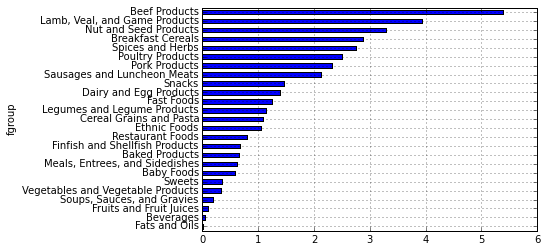

In [166]:
#ndata
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].order().plot(kind='barh')

In [171]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax())

In [172]:
get_minimum = lambda x: x.xs(x.value.idxmin())

In [173]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [175]:
max_foods.food = max_foods.food.str[:50]

In [176]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 